# Rollercoaster Project

The following is a study based on a set of two CSVs detailing awards handed out to rollercoasters, as well a seperate CSV specifying stats about different rollercoasters in the world (speed, height, length).

Below, I'll first track the rankings of a few rollercoasters based on the first two CSVs, before diving into the stats of different rollercoasters.

I'm finishing up with a comparison of the rollercoasters of Dutch theme park 'The Efteling' against the international averages.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
winners_wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
winners_steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

print(winners_wood.info())
print(winners_wood.info())

print(winners_wood.head())
print(winners_wood.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
Rank            180 non-null int64
Name            180 non-null object
Park            180 non-null object
Location        180 non-null object
Supplier        179 non-null object
Year Built      180 non-null int64
Points          180 non-null int64
Year of Rank    180 non-null int64
dtypes: int64(4), object(4)
memory usage: 11.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
Rank            180 non-null int64
Name            180 non-null object
Park            180 non-null object
Location        180 non-null object
Supplier        179 non-null object
Year Built      180 non-null int64
Points          180 non-null int64
Year of Rank    180 non-null int64
dtypes: int64(4), object(4)
memory usage: 11.4+ KB
None
   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake 

First, I'm creating two line plots for wooden and steel roller coasters. In particular, I want to illustrate the differences in ranking of specific roller coasters throughout the years of rank in our dataset.

The above inspections provide 180 rows for the wooden set, yet they contain years from 2013 to 2018. Hence, we would need to check how many rankings there are per year of this dataset.

In [3]:
print(winners_wood.Name.nunique())
print(winners_steel.Name.nunique())
print(winners_wood.Park.nunique())
print(winners_steel.Park.nunique())

# Number of years in the dataframe:

# Checking for number of ranks per year

print('Number of ranks per year:')

for year in range(2013, 2019):
    print(f"Number of wood rankings for year {year}: {winners_wood[winners_wood['Year of Rank'] == year].Rank.nunique()}")

print('------------------------------------------------')
          
for year in range(2013, 2019):          
    print(f"Number of steel rankings for year {year}: {winners_steel[winners_steel['Year of Rank'] == year].Rank.nunique()}")

# Checking for number of unique parks per year
print('------------------------------------------------')
print("Number of unique parks per year")
          
for year in range(2013, 2019):
    print(f"Number of parks (wood) per year {year}: {winners_wood[winners_wood['Year of Rank'] == year].Park.nunique()}")          

print('------------------------------------------------')          
          
for year in range(2013, 2019):
    print(f"Number of parks (steel) per year {year}: {winners_steel[winners_steel['Year of Rank'] == year].Park.nunique()}") 

61
63
54
36
Number of ranks per year:
Number of wood rankings for year 2013: 10
Number of wood rankings for year 2014: 10
Number of wood rankings for year 2015: 10
Number of wood rankings for year 2016: 49
Number of wood rankings for year 2017: 48
Number of wood rankings for year 2018: 47
------------------------------------------------
Number of steel rankings for year 2013: 10
Number of steel rankings for year 2014: 10
Number of steel rankings for year 2015: 10
Number of steel rankings for year 2016: 45
Number of steel rankings for year 2017: 45
Number of steel rankings for year 2018: 49
------------------------------------------------
Number of unique parks per year
Number of parks (wood) per year 2013: 10
Number of parks (wood) per year 2014: 10
Number of parks (wood) per year 2015: 10
Number of parks (wood) per year 2016: 41
Number of parks (wood) per year 2017: 40
Number of parks (wood) per year 2018: 40
------------------------------------------------
Number of parks (steel) per

The above print statements and for loops show that there are more rankings from 2016 onwards. As such, plotting all roller coasters on a single graph will give misleading information, as roller coasters below rank 10 are not represented in the first datasets.

Below, I identify which roller coasters occur in all six years, along with their rankings, so that we can plot these in a graph later

In [5]:
# Wood rollercoasters first:
# Generate a list of unique roller coasters from the dataframe:

wood_coasters = winners_wood['Name'].unique().tolist()  
          
# Check which roller coasters are accounted for in each year of the dataframe (6 years); print out all years and ranks

print('Wooden roller coasters appearing in all six years:')
for coaster in wood_coasters:
    if len(winners_wood[winners_wood['Name'] == coaster]['Year of Rank'].unique()) == 6:
        print(f"Roller Coaster {coaster} appears in these years: {winners_wood[winners_wood['Name'] == coaster]['Year of Rank'].tolist()}")
        print(f"Roller Coaster {coaster} rank per year: {winners_wood[winners_wood['Name'] == coaster]['Rank'].tolist()}")
        


# Steel rollercoasters:

steel_coasters = winners_steel['Name'].unique().tolist()
print('Steel roller coasters appearing all six years:')
            
for coaster in steel_coasters:
    if len(winners_steel[winners_steel['Name'] == coaster]['Year of Rank'].unique()) == 6:
        print(f"Roller Coaster {coaster} appears in these years: {winners_steel[winners_steel['Name'] == coaster]['Year of Rank'].tolist()}")
        print(f"Roller Coaster {coaster} rank per year: {winners_steel[winners_steel['Name'] == coaster]['Rank'].tolist()}")



Wooden roller coasters appearing in all six years:
Roller Coaster Boulder Dash appears in these years: [2013, 2014, 2015, 2016, 2017, 2018]
Roller Coaster Boulder Dash rank per year: [1, 1, 1, 1, 3, 4]
Roller Coaster El Toro appears in these years: [2013, 2014, 2015, 2016, 2016, 2017, 2017, 2018]
Roller Coaster El Toro rank per year: [2, 2, 2, 3, 25, 1, 41, 2]
Roller Coaster Phoenix appears in these years: [2013, 2014, 2015, 2016, 2017, 2018]
Roller Coaster Phoenix rank per year: [3, 4, 3, 2, 2, 1]
Roller Coaster Thunderhead appears in these years: [2013, 2014, 2015, 2016, 2017, 2018]
Roller Coaster Thunderhead rank per year: [5, 5, 5, 7, 8, 10]
Roller Coaster Ravine Flyer II appears in these years: [2013, 2014, 2015, 2016, 2017, 2018]
Roller Coaster Ravine Flyer II rank per year: [6, 6, 7, 5, 7, 8]
Roller Coaster Outlaw Run appears in these years: [2013, 2014, 2015, 2016, 2017, 2018]
Roller Coaster Outlaw Run rank per year: [7, 9, 8, 8, 9, 7]
Steel roller coasters appearing all six ye

In [6]:
# El Toro has several duplicates as the name occurs in two different parks:

print(winners_wood[winners_wood['Name'] == 'El Toro'])

     Rank     Name                       Park             Location  \
1       2  El Toro  Six Flags Great Adventure        Jackson, N.J.   
11      2  El Toro  Six Flags Great Adventure        Jackson, N.J.   
21      2  El Toro  Six Flags Great Adventure        Jackson, N.J.   
32      3  El Toro  Six Flags Great Adventure        Jackson, N.J.   
55     25  El Toro        Freitzeitpark Plohn  Legendfeld, Germany   
80      1  El Toro  Six Flags Great Adventure        Jackson, N.J.   
120    41  El Toro        Freitzeitpark Plohn  Legendfeld, Germany   
131     2  El Toro  Six Flags Great Adventure        Jackson, N.J.   

                Supplier  Year Built  Points  Year of Rank  
1                Intamin        2006    1302          2013  
11               Intamin        2006    1291          2014  
21               Intamin        2006    1464          2015  
32               Intamin        2006    1121          2016  
55   Great Coasters Int.        2009     166          2016  
80 

In [7]:
# Since the Freitzeitpark Plohn 'El Toro' doesn't fit our purpose (plotting for roller coasters represented in each year),
# dropping index 55 and 120 from the dataframe.

winners_wood = winners_wood.drop([winners_wood.index[55], winners_wood.index[120]])
print(winners_wood[winners_wood['Name'] == 'El Toro']['Rank'])

1      2
11     2
21     2
32     3
80     1
131    2
Name: Rank, dtype: int64


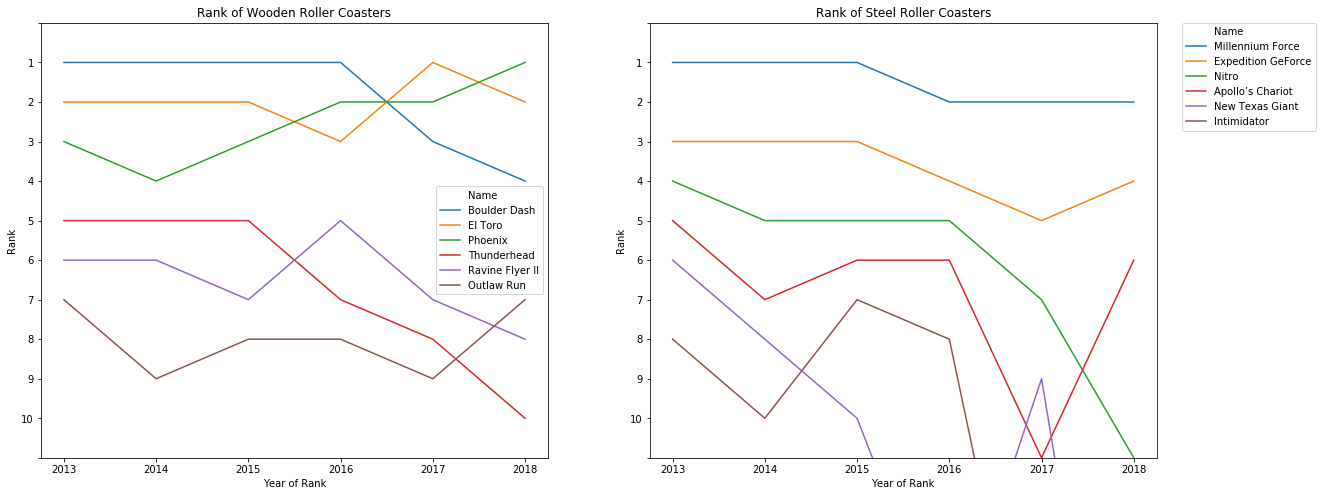

In [8]:
# Creating a new frame including only these roller coasters:

df_wood = winners_wood[(winners_wood['Name'] == 'Boulder Dash')|(winners_wood['Name'] == 'El Toro')\
                       |(winners_wood['Name'] == 'Phoenix')|(winners_wood['Name'] == 'Thunderhead')\
                       |(winners_wood['Name'] == 'Ravine Flyer II')|(winners_wood['Name'] == 'Outlaw Run')]

# Plotting these six roller coasters in a frame:

plt.figure(figsize=(20, 8))

ax1 = plt.subplot(1,2,1)

sns.lineplot(data = df_wood, x='Year of Rank', y='Rank', hue="Name")

ax1.invert_yaxis()
ax1.set_yticks(range(0,12))
ax1.set_yticklabels(['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

plt.title('Rank of Wooden Roller Coasters')

# Same for steel rollercoasters

df_steel = winners_steel[(winners_steel['Name'] == 'Millennium Force')|(winners_steel['Name'] == 'Expedition GeForce')\
                        |(winners_steel['Name'] == 'Nitro')|(winners_steel['Name'] == 'Apollo’s Chariot')\
                        |(winners_steel['Name'] == 'New Texas Giant')|(winners_steel['Name'] == 'Intimidator')]

ax2 = plt.subplot(1,2,2)

sns.lineplot(data = df_steel, x='Year of Rank', y='Rank', hue='Name')

ax2.invert_yaxis()
ax2.set_yticks(range(0,12))
ax2.set_yticklabels(['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Rank of Steel Roller Coasters')


plt.show()


Next are those rollercoasters which have a ranking of a minimum of 5:

In [9]:
# Note that 'Voyage' is listed as 'The Voyage' in certain rows:

print(winners_wood[(winners_wood['Name'] == 'Voyage')|(winners_wood['Name'] == 'The Voyage')])

     Rank        Name           Park           Location       Supplier  \
3       4  The Voyage  Holiday World  Santa Claus, Ind.  Gravity Group   
12      3  The Voyage  Holiday World  Santa Claus, Ind.  Gravity Group   
23      4  The Voyage  Holiday World  Santa Claus, Ind.  Gravity Group   
33      4  The Voyage  Holiday World  Santa Claus, Ind.  Gravity Group   
83      4      Voyage  Holiday World  Santa Claus, Ind.  Gravity Group   
132     3      Voyage  Holiday World  Santa Claus, Ind.  Gravity Group   

     Year Built  Points  Year of Rank  
3          2006    1086          2013  
12         2006    1129          2014  
23         2006    1184          2015  
33         2006    1028          2016  
83         2006    1113          2017  
132        2006    1086          2018  


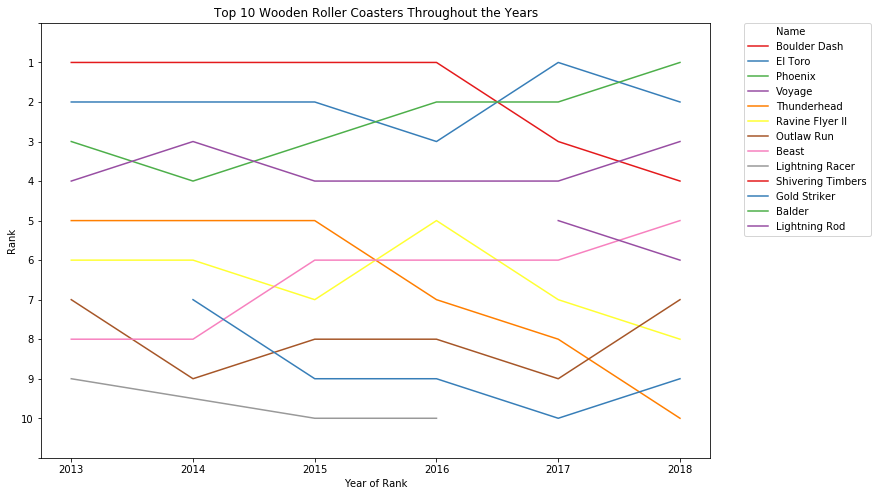

In [10]:
# Remove the 'The ' from 'Voyage' first:

winners_wood['Name'] = winners_wood['Name'].replace('The ', '', regex=True)

w_top_n_rankings = winners_wood[winners_wood['Rank'] <= 10]

plt.figure(figsize=(12,8))
ax3 = plt.subplot()

sns.lineplot(data=w_top_n_rankings, x='Year of Rank', y='Rank', hue='Name', palette='Set1')

ax3.invert_yaxis()
ax3.set_yticks(range(0,12))
ax3.set_yticklabels(['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Top 10 Wooden Roller Coasters Throughout the Years')

plt.show()

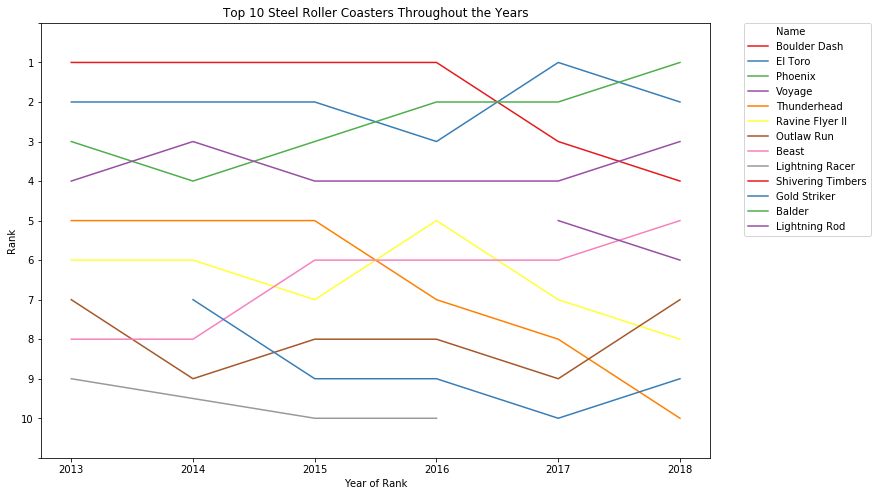

In [11]:
s_top_n_rankings = winners_steel[winners_steel['Rank'] <= 10]

plt.figure(figsize=(12,8))
ax4 = plt.subplot()

sns.lineplot(data=w_top_n_rankings, x='Year of Rank', y='Rank', hue='Name', palette='Set1')

ax4.invert_yaxis()
ax4.set_yticks(range(0,12))
ax4.set_yticklabels(['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Top 10 Steel Roller Coasters Throughout the Years')

plt.show()

## Checking data of individual roller coasters

Next we look at some stats of individual roller coasters.

In [12]:
# New dataframe providing statistics about particular rollercoasters

df_rc = pd.read_csv('roller_coasters.csv').dropna()

print(df_rc.head())
print(df_rc.info())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279 entries, 0 to 2799
Data columns (total 10 columns):
name              1279 non-null object
materia

First up, I'm creating a histogram of the speed of the different roller coasters. This will give an idea of the distribution of speed throughout the dataframe.

In [13]:
# first we define some stats about the data: the slowest speed and the fastest speed, as well as the average and medians:

min_speed = np.min(df_rc.speed)
max_speed = np.max(df_rc.speed)
avg_speed = np.mean(df_rc.speed)
med_speed = np.median(df_rc.speed)

print(min_speed)
print(max_speed)
print(avg_speed)

print(df_rc[df_rc['speed'] == 0.0].name)
print(df_rc[df_rc['speed'] == 240.0].name)

0.0
240.0
71.57466770914777
1835                          Dragonfire
2499                         Wilde Hilde
2505               Unnamed Hyper Coaster
2507              Unnamed Family Dueling
2508                  Unnamed Wing Rider
2510                       Forest Trains
2515                   Alien vs Predator
2516    Sons of Anarchy & Weyland Yutani
2517                      Wings Over Rio
2538                       Non Renseigné
2539                       Non Renseigné
2543                          Coco Beach
2589                  Lieveheersbeestjes
Name: name, dtype: object
1397    Formula Rossa
Name: name, dtype: object


Speed op 0.0kph is unlikely to be correct; 240kph is indeed correct for that roller coaster.

The range of the histogram will be adjusted to ignore the 0kph values. Note that in the graph below, the dashed line indicates the average speed (71kph)

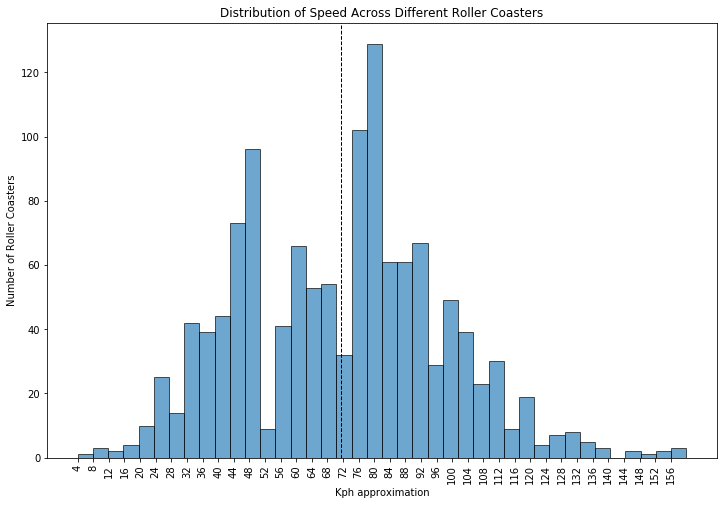

In [14]:
plt.figure(figsize=(12, 8))

ax3 = plt.subplot()

ax3.hist(df_rc['speed'], bins=40, range=(4,160), edgecolor='k', alpha=0.65)
plt.axvline(avg_speed, color='k', linestyle='dashed', linewidth=1)

ax3.set_xticks(range(4,160,4))
plt.xticks(rotation=90)

plt.title('Distribution of Speed Across Different Roller Coasters')
plt.ylabel('Number of Roller Coasters')
plt.xlabel('Kph approximation')


plt.show()

Next up, I'm creating three violin plots (boxplot with integrated kernel density estimation) of the height, speed, and length:

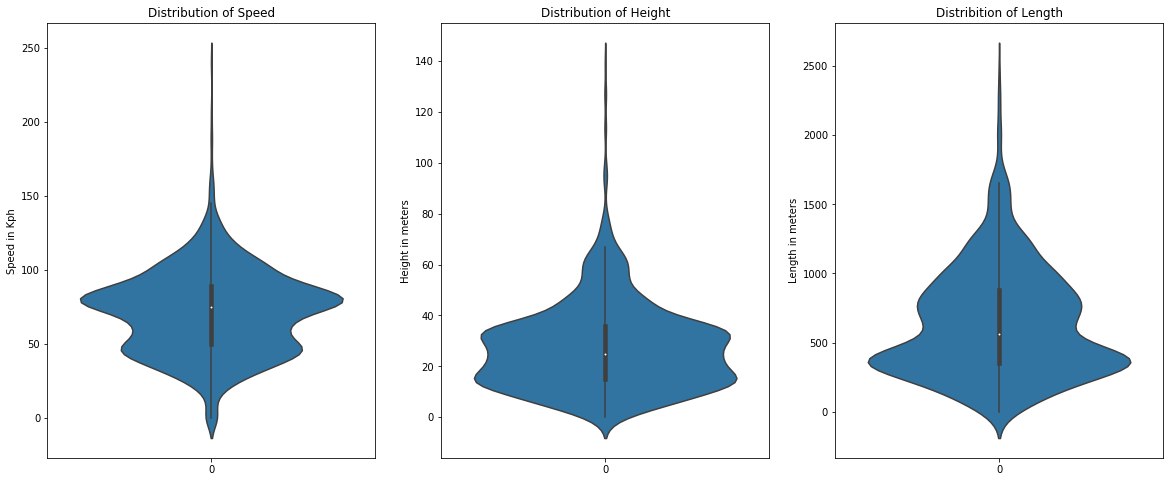

In [62]:
# The df includes an entry where the height is over 800 meters (tallest is 139m), we get rid of outliers first.
# Note that the fastest roller coaster is indeed 240kph (Formula Rossa, Abu Dhabi)

df_rc_cleaned = df_rc[(df_rc['height'] < 140)]

plt.figure(figsize=(20, 8))

plt.subplot(1,3,1)
sns.violinplot(data=df_rc['speed'])
plt.title('Distribution of Speed')
plt.ylabel('Speed in Kph')

plt.subplot(1,3,2)
sns.violinplot(data=df_rc_cleaned['height'])
plt.title('Distribution of Height')
plt.ylabel('Height in meters')

plt.subplot(1,3,3)
sns.violinplot(data=df_rc['length'])
plt.title('Distribition of Length')
plt.ylabel('Length in meters')

plt.show()

Taking a look at the Efteling, we can create the following distributions:

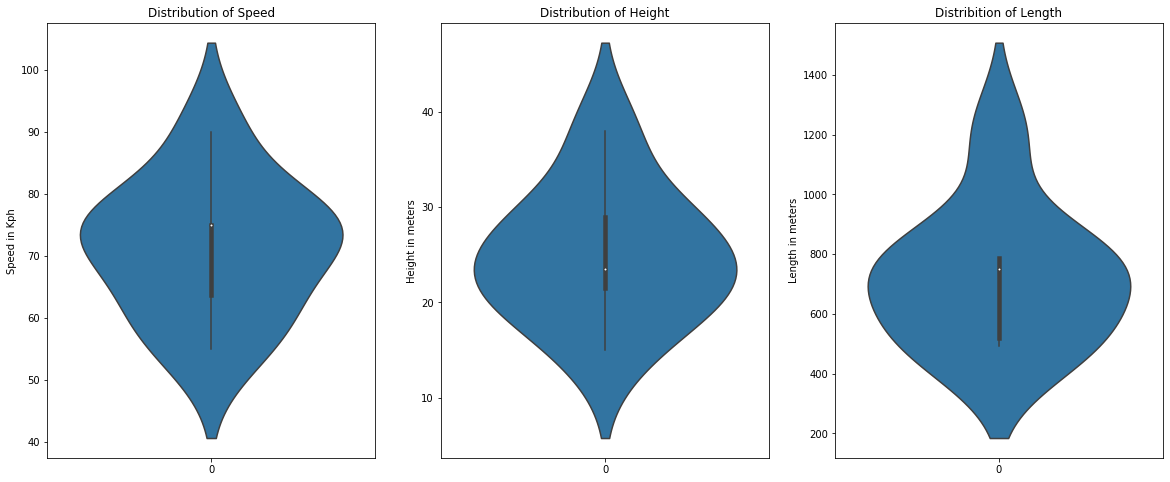

In [16]:
efteling = df_rc[df_rc['park'] == 'Efteling'].reset_index()


plt.figure(figsize=(20, 8))

plt.subplot(1,3,1)
sns.violinplot(data=efteling['speed'])
plt.title('Distribution of Speed')
plt.ylabel('Speed in Kph')

plt.subplot(1,3,2)
sns.violinplot(data=efteling['height'])
plt.title('Distribution of Height')
plt.ylabel('Height in meters')

plt.subplot(1,3,3)
sns.violinplot(data=efteling['length'])
plt.title('Distribition of Length')
plt.ylabel('Length in meters')

plt.show()

In [63]:
print(f"Global median speed: {np.median(df_rc['speed'])}kph")
print(f"Efteling median speed: {np.median(efteling['speed'])}kph")
print("----------------------------------")
print(f"Global mean speed: {np.mean(df_rc['speed'])}kph")
print(f"Efteling mean speed: {np.mean(efteling['speed'])}kph")
print("----------------------------------")
print(f"Global median height: {np.median(df_rc['height'])}m")
print(f"Efteling median height: {np.median(efteling['height'])}m")
print("----------------------------------")
print(f"Global mean height: {np.mean(df_rc['height'])}m")
print(f"Efteling mean height: {np.mean(efteling['height'])}m")
print("----------------------------------")
print(f"Global median length: {np.median(df_rc['length'])}m")
print(f"Efteling median length: {np.median(efteling['length'])}m")
print("----------------------------------")
print(f"Global mean length: {np.mean(df_rc['length'])}m")
print(f"Efteling mean length: {np.mean(efteling['length'])}m")

Global median speed: 75.0kph
Efteling median speed: 75.0kph
----------------------------------
Global mean speed: 71.57466770914777kph
Efteling mean speed: 71.25kph
----------------------------------
Global median height: 25.0m
Efteling median height: 23.5m
----------------------------------
Global mean height: 28.935105551211883m
Efteling mean height: 25.0m
----------------------------------
Global median length: 566.0m
Efteling median length: 750.0m
----------------------------------
Global mean length: 641.0500390930414m
Efteling mean length: 724.0m


In terms of distribution, we can plot the following KDEs:

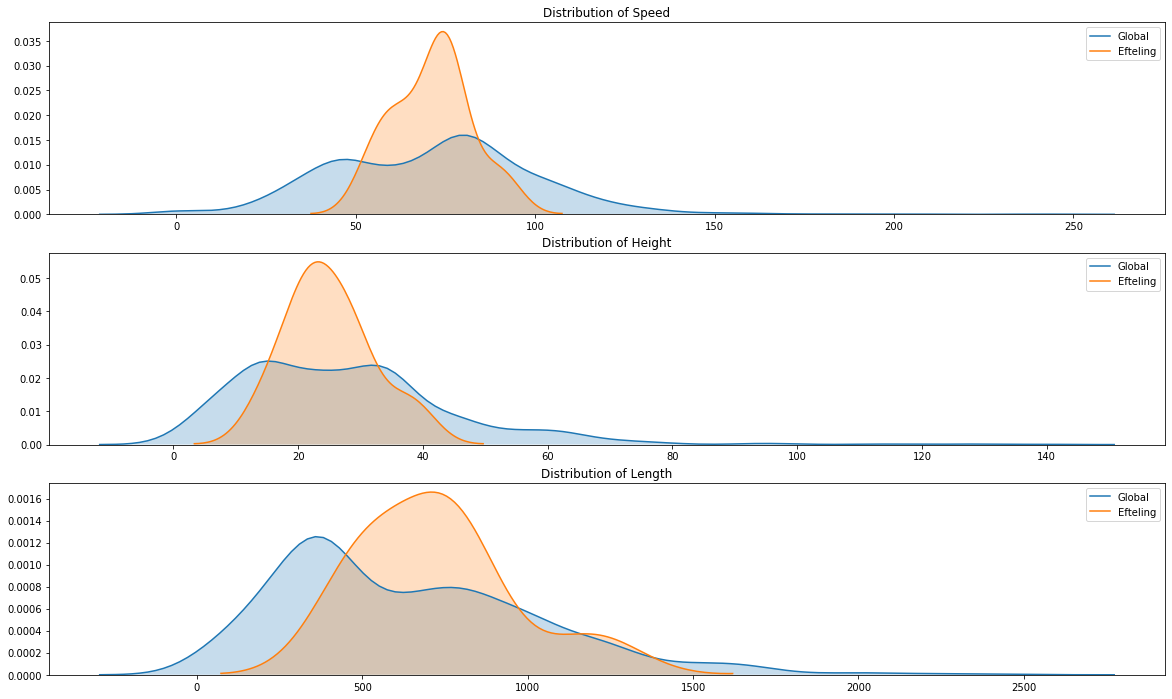

In [70]:
plt.figure(figsize=(20,12))

plt.subplot(311)

sns.kdeplot(data=df_rc['speed'], shade=True)
sns.kdeplot(data=efteling['speed'], shade=True)

plt.legend(['Global', 'Efteling'])
plt.title('Distribution of Speed')


plt.subplot(312)

sns.kdeplot(data=df_rc_cleaned['height'], shade=True)
sns.kdeplot(data=efteling['height'], shade=True)

plt.legend(['Global', 'Efteling'])
plt.title('Distribution of Height')          
          
plt.subplot(313)
          
sns.kdeplot(data=df_rc['length'], shade=True)
sns.kdeplot(data=efteling['length'], shade=True)

plt.legend(['Global', 'Efteling'])
plt.title('Distribution of Length')

plt.show()

Are speed and height related to each other? Scatterplot to illustrate the relation between these two values:

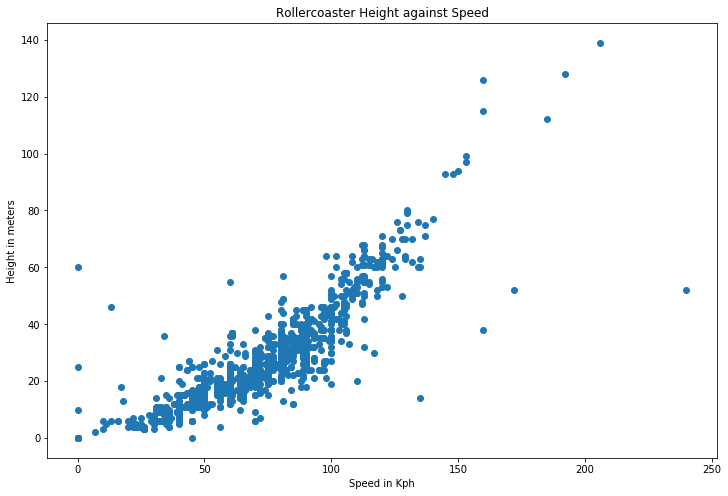

In [72]:
plt.figure(figsize=(12,8))

# The df includes an entry where the height is over 800 meters (tallest is 139m); the following cleans this up.
# Note that the fastest roller coaster is indeed 240kph (Formula Rossa, Abu Dhabi)

df_rc_cleaned = df_rc[(df_rc['height'] < 140)]

ax7 = plt.subplot()

plt.scatter(df_rc_cleaned['speed'], df_rc_cleaned['height'])

plt.title("Rollercoaster Height against Speed")
plt.ylabel("Height in meters")
plt.xlabel("Speed in Kph")

plt.show()

Finally, a quick look as to the status of the rollercoasters in this dataset (operational, closed down, under construction, etc.)

In [67]:
# Print out the different statuses in our dataset:

statuses = df_rc.status.unique().tolist()

status_counts = []

for status in statuses:
    status_counts.append(len(df_rc[df_rc['status'] == status]))

print(statuses) 
print(status_counts)


['status.operating', 'status.relocated', 'status.retracked', 'status.closed.definitely', 'status.closed.temporarily', 'status.unknown', 'status.construction', 'status.announced']
[1034, 15, 16, 169, 8, 4, 17, 16]


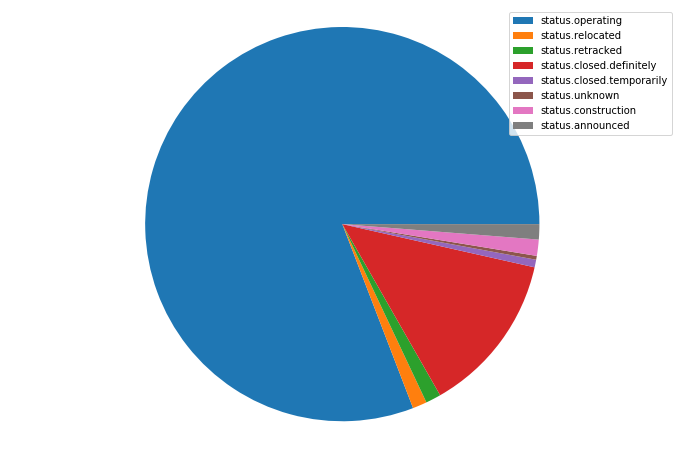

In [68]:
# Plotted in a pie chart:

plt.figure(figsize=(12,8))
plt.pie(status_counts)
plt.axis('equal')


plt.legend(statuses)

plt.show()

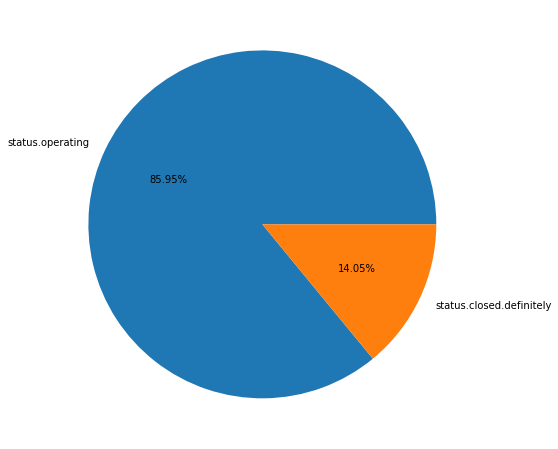

In [74]:
# Operational against closed definitely:

statuses = df_rc.status.unique().tolist()

status_counts2 = []
statuses_2 = []

for status in statuses:
    if len(df_rc[df_rc['status'] == status])>100:
        status_counts2.append(len(df_rc[df_rc['status'] == status]))
        statuses_2.append(status)

#print(statuses_2) 
#print(status_counts2)

plt.figure(figsize=(12,8))
plt.pie(status_counts2, labels=statuses_2, autopct='%0.2f%%')

plt.show()

# Thanks!